In [1]:
import sys
repo_dir = '/home/labs/amit/noamsh/repos/MM_2023'
sys.path.append(repo_dir)

%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

from omegaconf import OmegaConf
import scanpy as sc
import pandas as pd
import anndata as ad

from data_loading.utils import load_dataframe_from_file
from io_utils import generate_path_in_output_dir

## high in PC vs other cells on healthy tissu

In [3]:
data_dir = Path("/home/labs/amit/noamsh/data/mm_2023/targets")
huamn_prot_atlas_pc_enriched = load_dataframe_from_file(Path(data_dir, "cell_type_category_rna_Plasma_Cell_type_enriched.tsv"))
huamn_prot_atlas_group_enriched = load_dataframe_from_file(Path(data_dir, "cell_type_category_rna_Plasma_group_enriched.tsv"))

In [4]:
pd.concat([huamn_prot_atlas_pc_enriched, huamn_prot_atlas_group_enriched], axis=0, keys=("pc_enriched", "group_enriched")).reset_index().drop(columns="level_1").rename(columns={"level_0":"hpa_enrichment_type"})

,hpa_enrichment_type,Gene,Gene description,Subcellular location,Subcellular main location,Subcellular additional location,TAU score - Single Cell Type,Single Cell Type RNA - Plasma cells [nTPM]
0,pc_enriched,BFSP2,Beaded filament structural protein 2,"Plasma membrane,Cytosol","Plasma membrane, Cytosol",NaN,0.95,16.3
1,pc_enriched,CCR10,C-C motif chemokine receptor 10,Endoplasmic reticulum,Endoplasmic reticulum,NaN,0.82,99.2
2,pc_enriched,CD27,CD27 molecule,Vesicles,Vesicles,NaN,0.90,455.7
3,pc_enriched,CD38,CD38 molecule,Plasma membrane,Plasma membrane,NaN,0.80,364.6
4,pc_enriched,DERL3,Derlin 3,Vesicles,Vesicles,NaN,0.80,1530.0
...,...,...,...,...,...,...,...,...
218,group_enriched,TNFRSF18,TNF receptor superfamily member 18,NaN,NaN,NaN,0.80,92.5
219,group_enriched,TRBV3-1,T cell receptor beta variable 3-1,NaN,NaN,NaN,0.98,6.1
220,group_enriched,TRBV5-4,T cell receptor beta variable 5-4,NaN,NaN,NaN,0.98,3.5
221,group_enriched,UBE2J1,Ubiquitin conjugating enzyme E2 J1,NaN,NaN,NaN,0.47,888.4


In [5]:
huamn_prot_atlas_pc_all = pd.concat([huamn_prot_atlas_pc_enriched, huamn_prot_atlas_group_enriched], axis=0, keys=("pc_enriched", "group_enriched"))
huamn_prot_atlas_pc_all = huamn_prot_atlas_pc_all.reset_index().drop(columns="level_1").rename(columns={"level_0":"hpa_enrichment_type"})
huamn_prot_atlas_pc_all = huamn_prot_atlas_pc_all[~ huamn_prot_atlas_pc_all["Gene"].str.startswith("IG")]
print(huamn_prot_atlas_pc_all.shape)
huamn_prot_atlas_pc_all.head()

(70, 8)


,hpa_enrichment_type,Gene,Gene description,Subcellular location,Subcellular main location,Subcellular additional location,TAU score - Single Cell Type,Single Cell Type RNA - Plasma cells [nTPM]
0,pc_enriched,BFSP2,Beaded filament structural protein 2,"Plasma membrane,Cytosol","Plasma membrane, Cytosol",NaN,0.95,16.3
1,pc_enriched,CCR10,C-C motif chemokine receptor 10,Endoplasmic reticulum,Endoplasmic reticulum,NaN,0.82,99.2
2,pc_enriched,CD27,CD27 molecule,Vesicles,Vesicles,NaN,0.90,455.7
3,pc_enriched,CD38,CD38 molecule,Plasma membrane,Plasma membrane,NaN,0.80,364.6
4,pc_enriched,DERL3,Derlin 3,Vesicles,Vesicles,NaN,0.80,1530.0


## high in PC cs other tme in BM

### load tme data

In [6]:
load_ts_iso = "2024-05-19"
data_version = "20240515"

In [7]:
config_path = Path(repo_dir, 'config.yaml')
conf = OmegaConf.load(config_path)

In [8]:
adata_tme = ad.read_h5ad(generate_path_in_output_dir(conf, conf.outputs.inferred_missing_annotation_file_name,
                                                 with_version=data_version, with_date_timestamp=load_ts_iso))
adata_tme

AnnData object with n_obs × n_vars = 478858 × 3862
    obs: 'Amp.Batch.ID', 'Seq.Batch.ID', 'Batch.Set.ID', 'Included', 'Tissue', 'Gating', 'Total.PC', 'Total.NonPC', 'Initial.Code', 'Disease', 'Time', 'Project', 'Cohort', 'Weizmann.Code', 'Hospital.Code', 'Clinical.Data', 'Method', 'cID', 'super_Population', 'Populations', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'Predicted'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'log1p', 'neighbors', 'pc', 'umap'
    obsm: 'X_scVI', 'X_umap', 'pc_X_scVI'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'pc_connectivities', 'pc_distances'

In [9]:
annotated_filtered_only_pc_path = Path(conf.outputs.output_dir, f"adata_with_scvi_annot_pred_data_v_{data_version}_ts_{load_ts_iso}_only_pc_annotated_filtered.h5ad")

non_noisy_malignant = ad.read_h5ad(annotated_filtered_only_pc_path)
non_noisy_malignant

AnnData object with n_obs × n_vars = 165001 × 3862
    obs: 'Amp.Batch.ID', 'Seq.Batch.ID', 'Batch.Set.ID', 'Included', 'Tissue', 'Gating', 'Total.PC', 'Total.NonPC', 'Initial.Code', 'Disease', 'Time', 'Project', 'Cohort', 'Weizmann.Code', 'Hospital.Code', 'Clinical.Data', 'Method', 'cID', 'super_Population', 'Populations', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'Predicted', 'number_of_diffrent_patients_in_nighborhood', 'pc_close_other_pc', 'pc_annotation', 'one_pateint_in_nighborhood', 'small_pateint_in_nighborhood', 'log_total_counts', 'noisy_malignant', 'noisy_malignant_by_umi'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Cohort_colors', 'Method_colors', 'PC_nighbors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'one_pateint_in_nighborhood_colors', 'pc', 'pc_annotation_colors', 'p

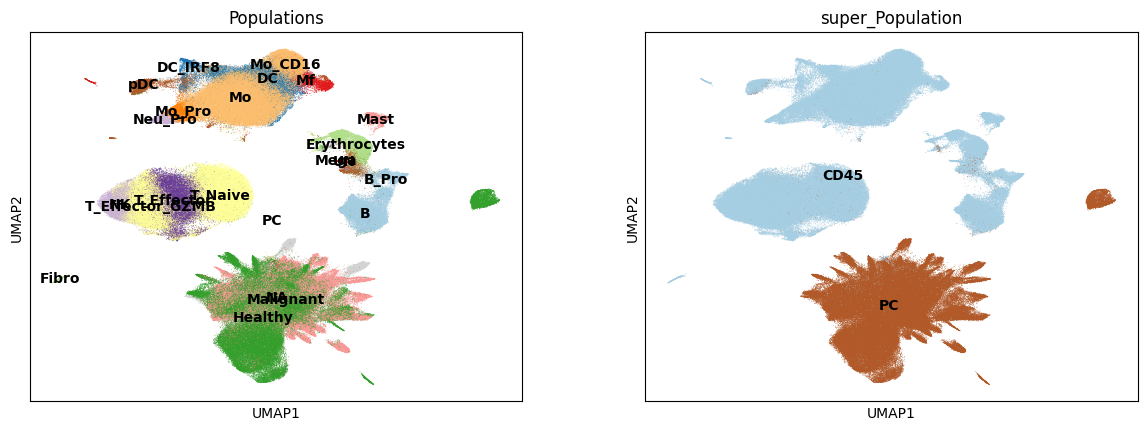

In [10]:
sc.pl.umap(adata_tme, color=['Populations', "super_Population"], ncols=3, palette="Paired", legend_loc='on data', size=1)

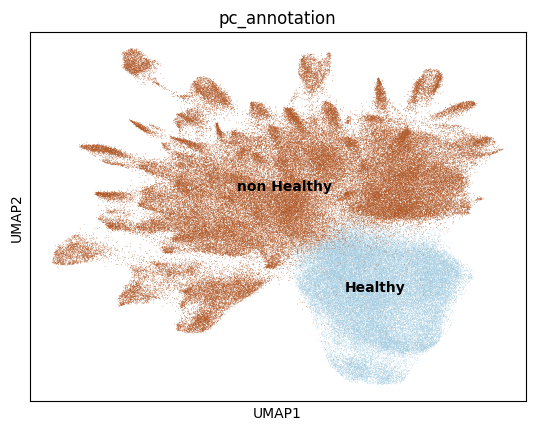

pc_annotation
non Healthy    118702
Healthy         46299
Name: count, dtype: int64

In [11]:
sc.pl.umap(non_noisy_malignant, color=["pc_annotation"], ncols=3, palette="Paired", legend_loc='on data', size=1)
non_noisy_malignant.obs["pc_annotation"].value_counts()

In [12]:
tme_non_noisy_pc_mask = pd.Series(adata_tme.obs_names).apply(lambda x: x in non_noisy_malignant.obs_names)
tme_non_noisy_pc_mask.index = adata_tme.obs_names

tme_non_noisy_tme_mask = (adata_tme.obs["super_Population"]=="CD45") & (adata_tme.obs["Populations"].apply(lambda x: x not in ("PC", "Malignant")))

In [13]:
adata_tme_filtered = adata_tme[tme_non_noisy_tme_mask | tme_non_noisy_pc_mask]

In [14]:
adata_tme_filtered.obs.update(non_noisy_malignant.obs["pc_annotation"].rename("Populations"))
adata_tme_filtered.obs["Populations"] = adata_tme_filtered.obs["Populations"].astype("category")

/tmp/ipykernel_19775/1077292314.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_tme_filtered.obs["Populations"] = adata_tme_filtered.obs["Populations"].astype("category")


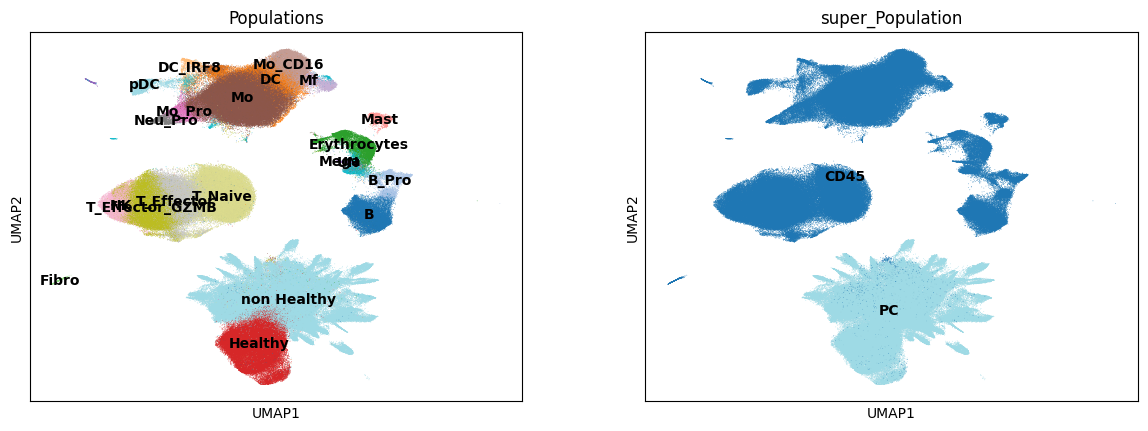

In [15]:
sc.pl.umap(adata_tme_filtered, color=[ 'Populations', "super_Population"], ncols=3, palette="tab20", legend_loc='on data', size=1)

### rank pc genes

In [16]:
sc.tl.rank_genes_groups(adata_tme_filtered, groupby="super_Population", method="wilcoxon")

KeyboardInterrupt: 

In [ ]:
sc.pl.rank_genes_groups_dotplot(
    adata_tme_filtered, groupby="super_Population", standard_scale="var", n_genes=7
)

In [ ]:
dc_genes = sc.get.rank_genes_groups_df(adata_tme_filtered, group="PC")
top_5_dc_genes = dc_genes.head(5)["names"]
sc.pl.umap(
    adata_tme_filtered,
    color=[*top_5_dc_genes, "super_Population"],
    legend_loc="on data",
    frameon=False,
    ncols=3,
)

In [ ]:
dc_genes

## high in malignant PC vs healthy pc in BM

In [ ]:
zstat_path = Path("/home/labs/amit/shuangyi/Project_MM3/Atlas/scvi_diff/zstat_Atlas_20240519_full.txt")
zstat_df = load_dataframe_from_file(zstat_path).rename(columns={'Unnamed: 0':"gene_name"}).set_index("gene_name").T
zstat_df

In [ ]:
(zstat_df > 2.5).mean().sort_values(ascending=False)

In [ ]:
within_malignant_scores = (zstat_df > 2).mean().sort_values(ascending=False)

## merge to canidate list

In [ ]:
dc_genes.set_index("names")["scores"].rename("pc_specificity")

In [ ]:
within_malignant_scores.rename("malignant_scores")

In [ ]:
hpa_genes.difference(set(dc_genes['names']))

In [ ]:
hpa_genes = set(huamn_prot_atlas_pc_all["Gene"])
print(f"hpa gene: {len(hpa_genes)}")
print(f"hpa gene with malignant score : {len(hpa_genes.intersection(set(within_malignant_scores.index)))}")
print(f"hpa gene with pc score : {len(hpa_genes.intersection(set(dc_genes['names'])))}")

In [ ]:
merged = huamn_prot_atlas_pc_all.set_index("Gene").merge(
    within_malignant_scores.rename("malignant_scores"), left_index=True, right_index=True, how="left").merge(
    dc_genes.set_index("names")["scores"].rename("pc_specificity"),  left_index=True, right_index=True, how="left")
merged

In [ ]:
merged.to_csv(Path(data_dir, "genes_of_interest.csv"))